#Sarcasm Detection in Tweets

##Business Problem
Sarcasm is a common linguistic tool on social media, often used to convey humour or criticism. However, its subtle nature makes it easily misinterpreted, especially by automated systems. When sarcastic tweets spread false information, it becomes difficult to distinguish between genuine news and fabricated content. This leads to rapidly disseminating misinformation, impacting public opinion and decision-making.

##Proposed Solution
Developing accurate sarcasm detection technology can help mitigate the spread of misinformation due to tweets. This technology can be integrated into social media platforms to flag potentially sarcastic content, allowing users to interpret information correctly.

The solution invloves the following steps:
* Data Collection and Labelling
* Data Preprocessing
* Model Training
* Evaluation





##Dataset Description
This dataset contains a collection of tweets with corresponding labels indicating whether the tweet is sarcastic (yes) or not sarcastic (no). The dataset aims to facilitate research and development of models capable of accurately detecting sarcasm in text-based content.

Data Format:

 Tweet: The text content of the tweet.\
 Sarcasm: A label (yes or no) indicating sarcasm (yes) or non-sarcasm (no).

##Data Visualization

The dataset used for this sarcasm detection model comprises 6,930 Tweets.

yes - 3633\
no - 3297

There are 3633 sarcastic tweets and 3297 non-sarcastic tweets in the dataset.

Train, Test and Validation test data size:
* Train size: 4435

* Test size: 1386

* Validation size: 1109



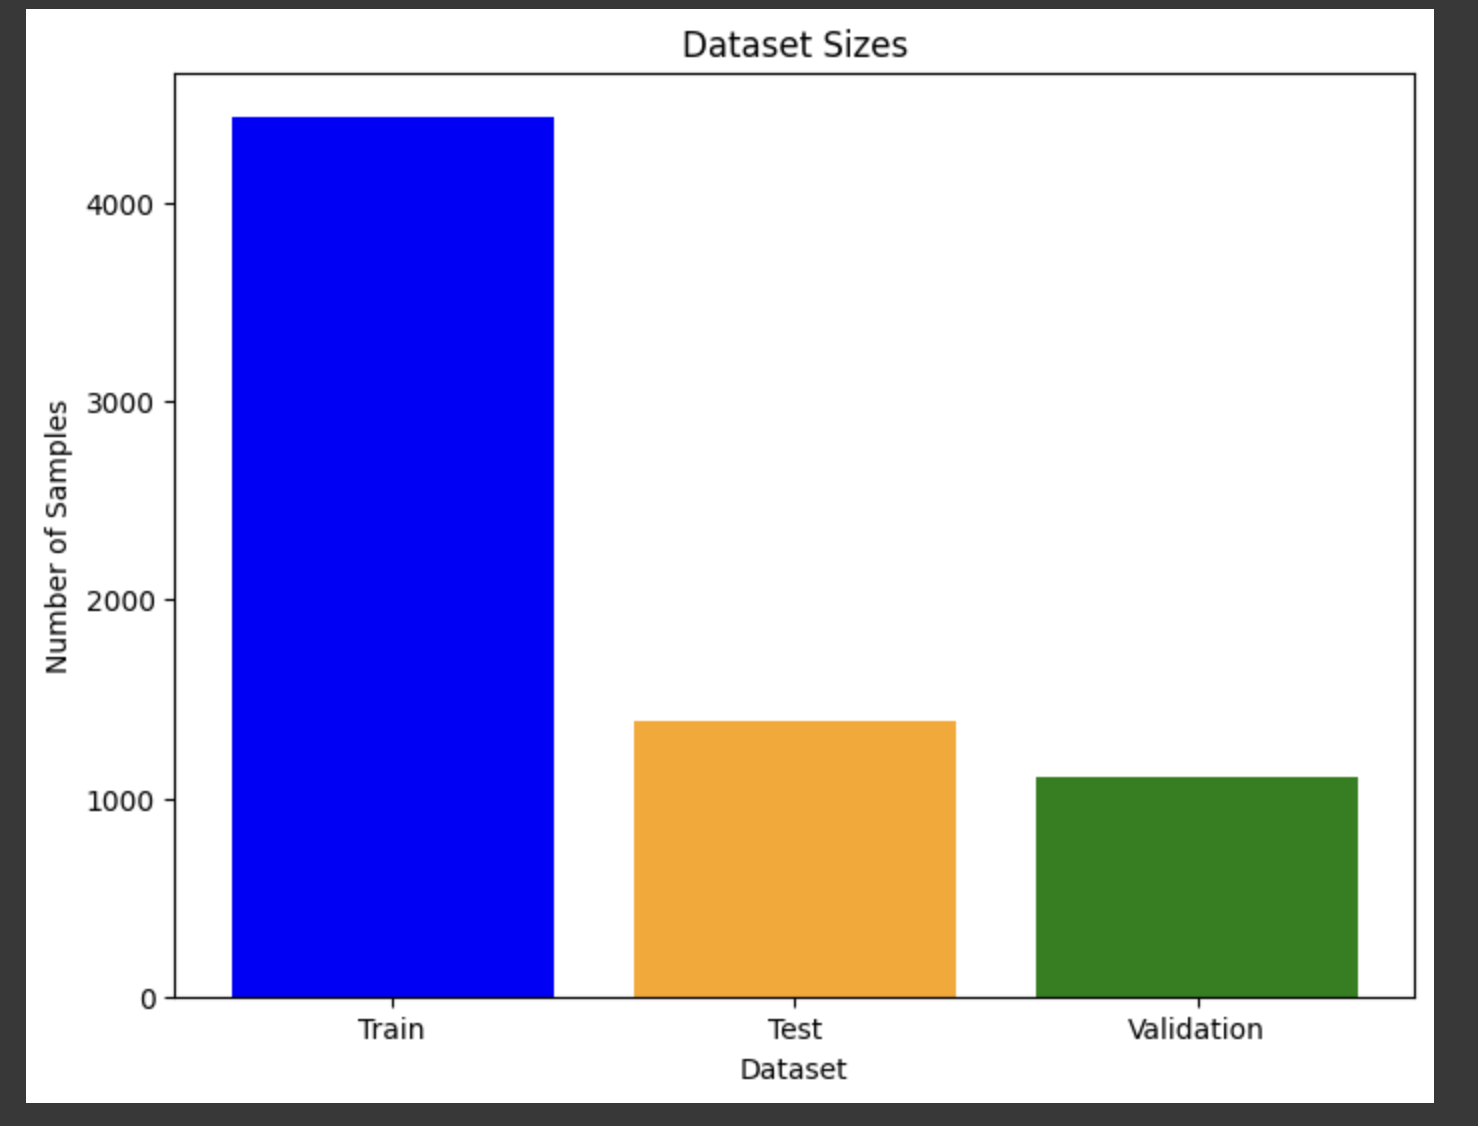

Label wise split in train data:
* Sarcastic: 2316

* Non-sarcastic: 2119

There are 2316 sarcastic rows and 2119 non-sarcatic rows in training dataset.

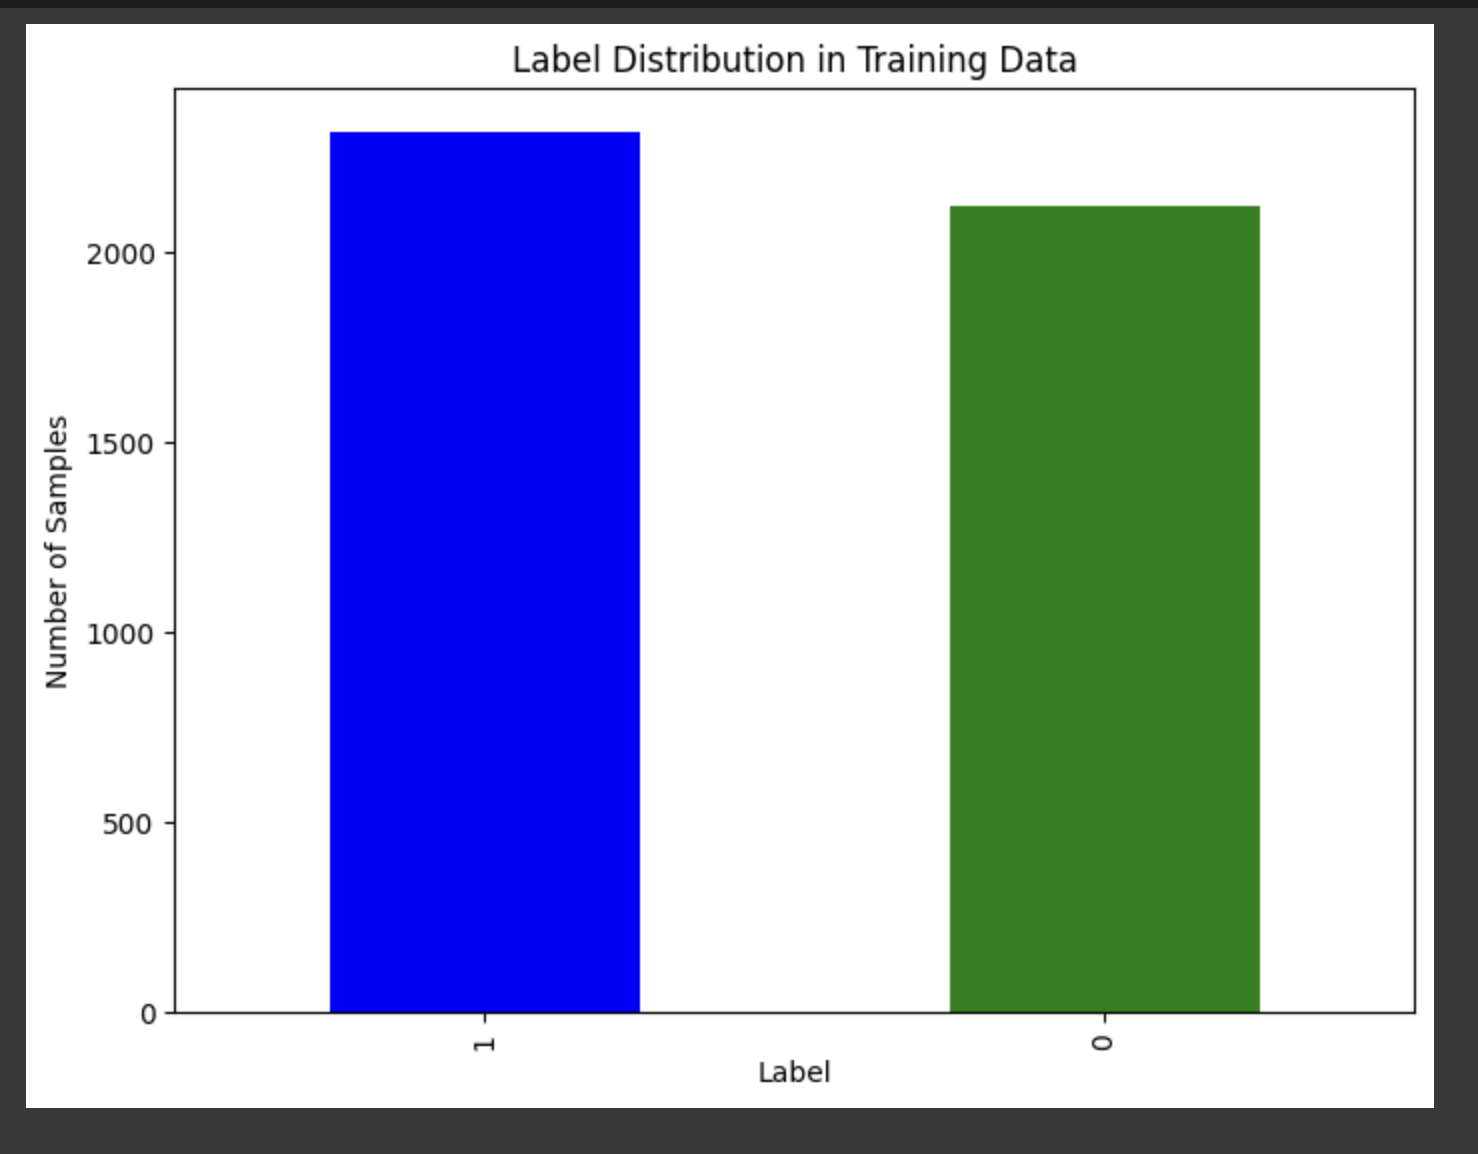

##Model Architecture:
The sarcasm detection model cantain different layers which are listed below:
Sure, here's a more concise version of the model architecture:

1. **Input Layer:**
   - Accepts sequences of integers (max length: 128).

2. **Embedding Layer:**
   - Converts words to embeddings.
   - Vocabulary size: 10,000, Embedding dimension: 512.

3. **Convolutional Layers (Conv1D):**
   - Three layers with filter sizes [3, 4, 5].
   - Number of filters: 40.
   - Activation functions: Tanh and Sigmoid.
   - Includes Dropout (rate: 0.2) and Global Max Pooling.

4. **Merged CNN Output:**
   - Concatenates outputs from the convolutional layers.

5. **Dense Layer (CNN path):**
   - Units: 128, Activation: ReLU, L2 regularization.
   - Includes Dropout (rate: 0.2).

6. **LSTM Layers:**
   - Five layers with units: 1024, 512, 256, 128, 64.
   - Outputs single vector per sequence.

7. **Final Merge:**
   - Concatenates the dense layer output with LSTM outputs.

8. **Dense Layer (final):**
   - Units: 32, Activation: ReLU, L2 regularization.
   - Includes Dropout (rate: 0.2).

9. **Output Layer:**
   - Single unit with Sigmoid activation for binary classification.

### Summary
This model combines CNN and LSTM architectures to leverage the strengths of both: CNNs for feature extraction at different scales and LSTMs for capturing sequential dependencies. The model uses dropout and L2 regularization to prevent overfitting, making it robust for sarcasm detection. The final output layer with a sigmoid activation function is suitable for binary classification.

Plotting the Confusion Matrix and Classification Report of the model

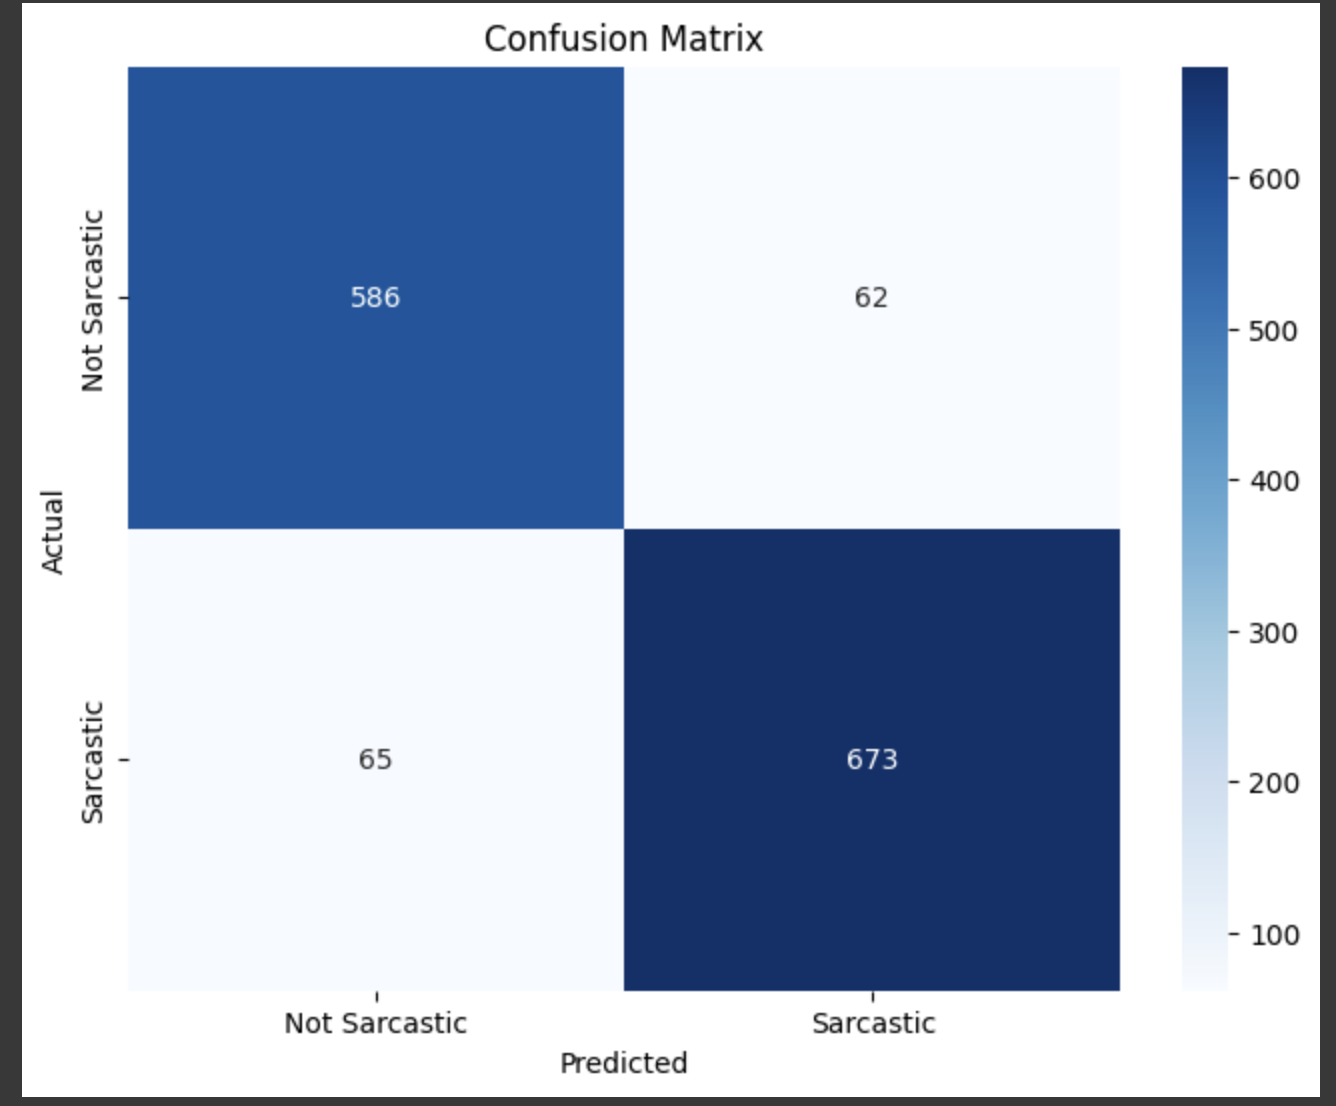

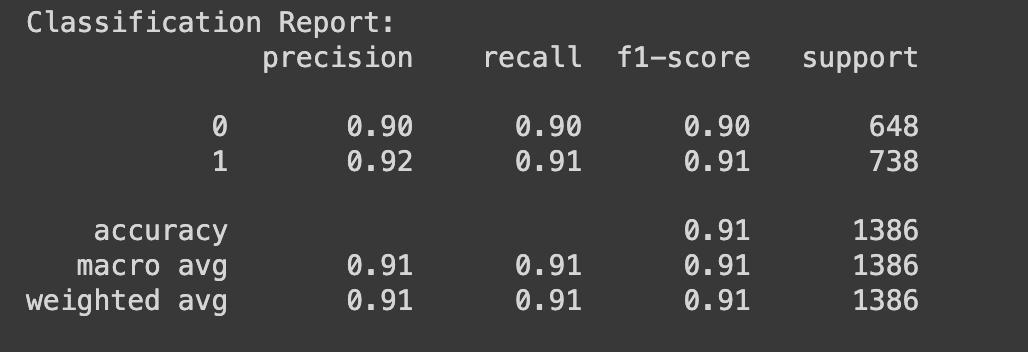

####Loading the model and creating a prediction function that takes a sample of 3 or 4 texts as input and prints the prediction beside the text:



In [11]:
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

In [21]:
max_len = 128
model = load_model('sarcasm_detection.h5')
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

Prediction Function:

In [19]:
def predict_sarcasm(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)
    prediction = model.predict(padded_sequence)
    if prediction > 0.5:
        return "This text is predicted to be sarcastic."
    else:
        return "This text is predicted to be non-sarcastic."

##**Example Tweets:**

In [39]:
new_text = "This restaurant is do good that it deserves a 0 star rating."
result = predict_sarcasm(new_text)
print(result)

1/1 [==============================] - 0s 35ms/step
This text is predicted to be sarcastic.


In [40]:
new_text = "Don't add this to my already overflowing to-do list."
result = predict_sarcasm(new_text)
print(result)

1/1 [==============================] - 0s 33ms/step
This text is predicted to be non-sarcastic.


In [41]:
new_text = "This new restaurant is a real gem, NOT."
result = predict_sarcasm(new_text)
print(result)

1/1 [==============================] - 0s 58ms/step
This text is predicted to be sarcastic.


In [42]:
new_text = "My mom asked me this question as well."
result = predict_sarcasm(new_text)
print(result)

1/1 [==============================] - 0s 26ms/step
This text is predicted to be non-sarcastic.


In [43]:
new_text = "Yay Monday, I love work loads."
result = predict_sarcasm(new_text)
print(result)

1/1 [==============================] - 0s 30ms/step
This text is predicted to be sarcastic.


#Conclusion:
The model is working and giving the correct predictions.